## Explorary Data Analysis For Cars Exhibtion
by: Amer Saleh, Naif Sulaihem <br>
Email: amersaleh.cs@gmail.com, naifsul100@gmail.com

## Appendix
* <a href=#intro>introduction</a>
* <a href=#imports>Imports</a>
* <a href=#exploreAndClean>Explore data and clean</a>
* <a href=#analysis>analysis</a>
* <a href=#visuals>visualization</a>




### <a name=#intro>introduction</a>


The history of transportation starts from the age of humans and has continued to change over some time. The first means of transportation was the human foot. The history of transport has undergone a radical change with the introduction of wheels. Existing means of transportation were continuously improved after that, for example, horse-drawn vehicles (carts or karts). Until the gas and fuel cars were invented

Cars are one of the most important necessities for every family, as they are the most popular means of transportation these days.

This project aims to analyze the used car market in the UK, compare car prices by type, engine, and car model, for example, which cars are most in demand. With the presence of more than one car company.

We will do a comprehensive analysis to find the best used cars to attract customers so that our showrooms are among the best and we can achieve the company's goal and vision for development in the used car sectors

### <a name='imports'>Imports</a>

In [1]:
import matplotlib.pyplot as plt


In [2]:
# Importing libraries
# Data Analysis Libs
print("Importing.....", end="", flush=True)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from pandas_profiling import ProfileReport
import statsmodels.api as sm
import math
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV
%matplotlib inline

# Machinelearning Libs
#from sklearn.linear_model import LinearRegressionegression

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')
print("[Done]")


Importing.....[Done]


In [3]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression

from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [3]:
! pip install -U pandas-profiling
from pandas_profiling import ProfileReport


###  <a name=#exploreAndClean>Explore data and clean</a>


#### Upload Data Sets
here we upload our data set, we have two data set as shown below thats for Ford and Volkeswagen.

In [4]:
df_1 = pd.read_csv('C:/Users/imora/Documents/EDA_t5/EDA_t5/ford.csv')# upload data of Ford csv

In [5]:
df_2 = pd.read_csv('C:/Users/imora/Documents/EDA_t5/EDA_t5/vw.csv')# upload data of Volkeswagen csv

here we merge the two data sets using shuffle from sklearn

In [6]:
data = pd.concat([df_1,df_2]).reset_index(drop = True)

In [7]:
data = shuffle(data)
data = data.reset_index(drop=True)

In [8]:
#this our profile data using pandas profiling
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

now we will explore our data to find null values and incorrect values:

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33122 entries, 0 to 33121
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         33122 non-null  object 
 1   year          33122 non-null  int64  
 2   price         33122 non-null  int64  
 3   transmission  33122 non-null  object 
 4   mileage       33122 non-null  int64  
 5   fuelType      33122 non-null  object 
 6   tax           33122 non-null  int64  
 7   mpg           33122 non-null  float64
 8   engineSize    33122 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 2.3+ MB


describe the data

In [9]:
data.describe()

year         price        mileage           tax           mpg  \
count  33122.000000  33122.000000   33122.000000  33122.000000  33122.000000   
mean    2017.044683  14366.095797   22782.077592    113.064428     56.006241   
std        2.060700   6698.673164   20266.265383     62.688154     12.043983   
min     1996.000000    495.000000       1.000000      0.000000      0.300000   
25%     2016.000000   9750.000000    8207.000000     30.000000     48.700000   
50%     2017.000000  12880.000000   17506.000000    145.000000     56.500000   
75%     2019.000000  17798.000000   31398.500000    145.000000     62.800000   
max     2060.000000  69994.000000  212000.000000    580.000000    201.800000   

         engineSize  
count  33122.000000  
mean       1.465168  
std        0.463069  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.000000  
max        5.000000

In [10]:
data.isna().sum()#thiss ccode to find sum of null values for each columns

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [11]:
data.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [12]:
data.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [13]:
data.year.unique()#we look up with unique values for years

array([2018, 2017, 2014, 2019, 2012, 2015, 2013, 2016, 2020, 2011, 2010,
       2008, 2009, 2006, 2007, 2005, 2004, 2003, 2001, 2060, 2002, 1998,
       2000, 1996], dtype=int64)

In [14]:
data[data.year > 2020].head(5)#here we need to know if there incorrect value


model  year  price transmission  mileage fuelType  tax   mpg  \
6660   Fiesta  2060   6495    Automatic    54807   Petrol  205  42.8   

      engineSize  
6660         1.4

In [15]:
data.shape

(33122, 9)

In [16]:
data.loc[data['year'] > 2020]#we look for the year more than 2020

model  year  price transmission  mileage fuelType  tax   mpg  \
6660   Fiesta  2060   6495    Automatic    54807   Petrol  205  42.8   

      engineSize  
6660         1.4

In [17]:
data.drop(data[data['year'] > 2020].index, inplace = True)#we drop all value that more than 2020

In [18]:
data.shape

(33121, 9)

In [19]:
mask1 = data[data['engineSize'] == 0.0]#we put all the dropped values to the mask, so we can do some analysis with mask1

In [20]:
mask1

model  year  price transmission  mileage fuelType  tax   mpg  \
452     Mondeo  2013   5328       Manual   105000   Diesel   30  65.7   
470     Fiesta  2017   9899       Manual    10000   Petrol    0  65.7   
940      Focus  2015   9072       Manual    23000   Petrol   20  58.9   
1080        Up  2017   8000       Manual    24444   Petrol   20  60.1   
2284    Passat  2018  19500    Automatic    22283   Petrol  145  48.7   
...        ...   ...    ...          ...      ...      ...  ...   ...   
30444     Golf  2015  11800       Manual    36205   Diesel   20  68.9   
30501   Passat  2019  18500    Automatic    11993   Petrol  145  41.5   
31502   Fiesta  2017  11783    Automatic    23000   Petrol    0  57.7   
31925       Up  2017   8500       Manual    20324   Petrol   20  64.2   
32368   Fiesta  2017   8702       Manual    15000   Petrol  150  65.7   

       engineSize  
452           0.0  
470           0.0  
940           0.0  
1080          0.0  
2284          0.0  
...           ...  
30444         0.0  
30501         0.0  
31502         0.0  
31925         0.0  
32368         0.0  

[66 rows x 9 columns]

In [262]:
data.drop(data[data['engineSize'] == 0.0].index, inplace = True)#drop all engineSize with 0.0

In [263]:
mask1

model  year  price transmission  mileage fuelType  tax   mpg  \
392       Beetle  2017  13800       Manual    17859   Petrol  125  53.3   
1365    EcoSport  2015   8500       Manual    33403   Diesel   30  61.4   
1704    EcoSport  2018  12867       Manual     9000   Petrol  145  54.3   
3411       Focus  2018  18389       Manual    19000   Petrol  145  67.3   
4217    EcoSport  2017  11999       Manual    24000   Petrol  145  52.3   
...          ...   ...    ...          ...      ...      ...  ...   ...   
32137      Focus  2017  12975       Manual    11000   Petrol  145  51.4   
32272       Golf  2015  11800       Manual    36205   Diesel   20  68.9   
32505         KA  2018   9899       Manual     6000   Petrol  145  43.5   
32903     Fiesta  2017   9899       Manual    10000   Petrol    0  65.7   
33104      Focus  2015  14300       Manual    40457   Diesel   20  67.3   

       engineSize  
392           0.0  
1365          0.0  
1704          0.0  
3411          0.0  
4217          0.0  
...           ...  
32137         0.0  
32272         0.0  
32505         0.0  
32903         0.0  
33104         0.0  

[66 rows x 9 columns]

In [21]:
data['engineSize']

0        1.5
1        2.0
2        2.0
3        1.0
4        1.2
        ... 
33117    2.0
33118    1.0
33119    1.0
33120    1.0
33121    1.0
Name: engineSize, Length: 33121, dtype: float64

In [22]:
data.shape

(33121, 9)

In [23]:
data[data.mpg < 20]#we wanna look for incorrect data for mpg columns

model  year  price transmission  mileage fuelType  tax  mpg  \
20036   Golf SV  2019  17950       Manual      100   Petrol  145  0.3   

       engineSize  
20036         1.0

In [24]:
data.shape

(33121, 9)

In [25]:
data.loc[(data.year == 2019) & (data.model == " Golf SV") & (data.transmission == "Manual") & (data.engineSize == 1) , :]

model  year  price transmission  mileage fuelType  tax   mpg  \
5102    Golf SV  2019  15995       Manual     2506   Petrol  145  47.1   
12778   Golf SV  2019  16995       Manual     1353   Petrol  145  47.1   
20036   Golf SV  2019  17950       Manual      100   Petrol  145   0.3   

       engineSize  
5102          1.0  
12778         1.0  
20036         1.0

In [26]:
#we replace 0.3 value with correct value 
data.loc[(data.year == 2019) & (data.model == " Golf SV") & (data.transmission == "Manual") & (data.engineSize == 1) , 'mpg'] = 47.1

In [27]:
#drop tax columns
data = data.drop('tax' , axis=1)

In [28]:
data

model  year  price transmission  mileage fuelType   mpg  engineSize
0           Kuga  2018  15790       Manual     7721   Diesel  54.3         1.5
1           Kuga  2017  13331       Manual    21223   Diesel  60.1         2.0
2       Scirocco  2014   9975       Manual    70000   Diesel  55.4         2.0
3           Polo  2019  12990       Manual    12454   Petrol  52.3         1.0
4             KA  2012   3491       Manual    86667   Petrol  57.7         1.2
...          ...   ...    ...          ...      ...      ...   ...         ...
33117      S-MAX  2017  14990       Manual    49789   Diesel  56.5         2.0
33118      Focus  2019  16300       Manual     5113   Petrol  60.1         1.0
33119       Polo  2020  18495    Semi-Auto     5129   Petrol  46.3         1.0
33120         Up  2015   5969       Manual    21603   Petrol  61.4         1.0
33121     Fiesta  2015   9000    Automatic    22093   Petrol  57.7         1.0

[33121 rows x 8 columns]

In [29]:
data.to_csv('usedCarsData.csv')

###   <a name=#analysis>analysis</a>

In [63]:
#counts frequency year
dataY = pd.value_counts(data['year'])
dataY

2019    7851
2017    7814
2018    5502
2016    4976
2015    2514
2014    1384
2020    1303
2013     922
2012     195
2011     151
2009     122
2010     108
2008      84
2007      52
2006      29
2005      24
2004       7
2003       5
2002       4
2001       4
2000       2
1998       1
1996       1
Name: year, dtype: int64

In [33]:
#counts frequency model
dataC = pd.value_counts(data['model'])
dataC

 Fiesta                   6537
 Golf                     4860
 Focus                    4577
 Polo                     3287
 Kuga                     2224
 Tiguan                   1762
 EcoSport                 1135
 Passat                    911
 Up                        882
 T-Roc                     731
 C-MAX                     543
 Ka+                       527
 Mondeo                    525
 Touareg                   363
 B-MAX                     355
 Touran                    352
 T-Cross                   300
 S-MAX                     296
 Golf SV                   268
 Sharan                    260
 Arteon                    248
 Grand C-MAX               247
 Scirocco                  242
 Galaxy                    228
 Edge                      208
 KA                        193
 Amarok                    111
 Caravelle                 101
 CC                         95
 Tiguan Allspace            91
 Beetle                     82
 Puma                       79
 Tourneo

In [34]:
#mean price of used cars
round(data.price.mean(),2)

14369.37

In [35]:
round(data.describe(), 2)

year     price    mileage       mpg  engineSize
count  33055.00  33055.00   33055.00  33055.00    33055.00
mean    2017.04  14369.37   22787.35     56.01        1.47
std        2.05   6701.99   20272.95     12.04        0.46
min     1996.00    495.00       1.00     20.80        1.00
25%     2016.00   9750.00    8202.50     48.70        1.00
50%     2017.00  12890.00   17502.00     56.50        1.50
75%     2019.00  17799.00   31412.00     62.80        2.00
max     2020.00  69994.00  212000.00    201.80        5.00

In [36]:
#we analyze Golf data
dataGolf = data.loc[(data.model == " Golf"), :]

In [37]:
dataGolf

model  year  price transmission  mileage fuelType   mpg  engineSize
0       Golf  2019  18898       Manual       10   Petrol  47.1         1.5
10      Golf  2016  13499    Automatic    16827   Petrol  53.3         1.4
17      Golf  2019  17490       Manual     2899   Petrol  47.1         1.5
29      Golf  2020  20990       Manual     1000   Petrol  49.6         1.5
41      Golf  2019  20495    Automatic     5488   Diesel  52.3         2.0
...      ...   ...    ...          ...      ...      ...   ...         ...
33110   Golf  2013   7450       Manual    61520   Petrol  53.3         1.4
33111   Golf  2017  12698    Semi-Auto    32243   Diesel  58.9         1.6
33112   Golf  2019  20550    Semi-Auto     5308   Diesel  52.3         2.0
33114   Golf  2015   8491       Manual    70986   Diesel  68.9         2.0
33115   Golf  2016  11690       Manual    23020   Petrol  53.3         1.4

[4860 rows x 8 columns]

In [38]:
sumAll= dataGolf["price"]# sum of all Golf car price
sumAll.sum()

81119540

In [39]:
yearGolf = pd.value_counts(dataGolf["year"])
yearGolf

2019    1545
2016     963
2017     874
2015     430
2018     378
2020     257
2014     218
2013     114
2012      18
2011      16
2010      14
2009      11
2008       7
2005       4
2006       3
2007       3
2004       2
2000       1
2003       1
2002       1
Name: year, dtype: int64

In [40]:
#count transmission of Golf
transGolf = pd.value_counts(dataGolf["transmission"])
transGolf

Manual       2934
Semi-Auto    1336
Automatic     590
Name: transmission, dtype: int64

In [41]:
fuelGolf = pd.value_counts(dataGolf["fuelType"])
fuelGolf

Petrol    2704
Diesel    2041
Hybrid      87
Other       28
Name: fuelType, dtype: int64

In [42]:
round(dataGolf.groupby('year')['mileage'].agg(np.mean)).tail()

year
2016    35051.0
2017    26653.0
2018    20204.0
2019     6932.0
2020     2055.0
Name: mileage, dtype: float64

In [43]:
# try to find the mean of prices by years
meanPerYearGolf = dataGolf.groupby('year')['price'].agg(np.mean)
round(meanPerYearGolf)

year
2000     1999.0
2002     1275.0
2003    12450.0
2004     1418.0
2005     2546.0
2006     2894.0
2007     3591.0
2008     3894.0
2009     5009.0
2010     4642.0
2011     7435.0
2012     8147.0
2013     8385.0
2014    10443.0
2015    12286.0
2016    14023.0
2017    15602.0
2018    17573.0
2019    20667.0
2020    25016.0
Name: price, dtype: float64

In [44]:
dataFiesta = data.loc[(data.model == " Fiesta") , :]
dataFiesta

model  year  price transmission  mileage fuelType   mpg  engineSize
6       Fiesta  2017  10680       Manual    19741   Petrol  65.7         1.0
9       Fiesta  2014   6897       Manual    27361   Petrol  65.7         1.0
11      Fiesta  2017   7800       Manual    29543   Petrol  54.3         1.2
14      Fiesta  2017   7990       Manual    26850   Petrol  65.7         1.0
15      Fiesta  2018  14500       Manual    14698   Petrol  62.8         1.0
...        ...   ...    ...          ...      ...      ...   ...         ...
33078   Fiesta  2018  10370       Manual    34292   Petrol  65.7         1.0
33081   Fiesta  2018  10500       Manual    35519   Petrol  65.7         1.0
33098   Fiesta  2017  10197       Manual    10152   Petrol  62.8         1.0
33099   Fiesta  2018   8791       Manual    21618   Petrol  65.7         1.0
33117   Fiesta  2008   2350       Manual    59500   Petrol  47.1         1.2

[6537 rows x 8 columns]

In [45]:
dataFiesta.groupby('year')['mileage'].agg(np.mean).tail(6)

year
2015    31133.301811
2016    25813.323910
2017    20020.853674
2018    16428.221366
2019     7502.579694
2020     1002.000000
Name: mileage, dtype: float64

In [46]:
dataGolf.groupby('year')['price'].agg(np.mean).tail()

year
2016    14023.249221
2017    15602.494279
2018    17572.923280
2019    20666.740453
2020    25016.116732
Name: price, dtype: float64

In [47]:
dataGolf.corr()

year     price   mileage       mpg  engineSize
year        1.000000  0.700723 -0.771765 -0.248059   -0.098524
price       0.700723  1.000000 -0.669186 -0.356026    0.358566
mileage    -0.771765 -0.669186  1.000000  0.335082    0.119921
mpg        -0.248059 -0.356026  0.335082  1.000000   -0.124036
engineSize -0.098524  0.358566  0.119921 -0.124036    1.000000

### <a name=#visuals>visualization</a>

In [60]:
dataY.head(10).plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Count")
plt.title('Most Year Cars');

In [49]:
dataC.head(10).plot(kind='bar')
plt.xlabel("Car Name")
plt.ylabel("Count")
plt.title('Most Popular Cars');

In [50]:
sns.catplot(x="fuelType", y="price", kind="box", data=dataGolf);

In [57]:
plt.figure(figsize=(20,20),facecolor='w')
sns.catplot(x="fuelType", y="price",kind="bar", data=dataGolf);

In [56]:
sns.countplot(x="year", data=dataGolf.head(10));

In [55]:
yearGolf.head(10).plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Count")
plt.title('Most Year Golf Cars');

In [58]:
round(dataGolf.groupby('year')['mileage'].agg(np.mean)).tail(5).plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Mileage")
plt.title('Mean Mileage of Golf for each year');

In [59]:
sns.countplot(dataGolf["fuelType"]);
plt.title("Fuel type of Golf");

C:\Users\imora\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [ ]:
plt.figure(figsize=(15,5),facecolor='w') 
sns.barplot(x = dataGolf["year"], y = dataGolf["price"])

In [ ]:
yearGolf.head(5).plot(kind='bar')
plt.title('popular Golf model');

In [ ]:
sns.pairplot(dataGolf)

In [ ]:
round(dataGolf.groupby('year')['price'].agg(np.mean).tail()).plot(kind="bar");
plt.xlabel("Year")
plt.ylabel("Price")
plt.title('Mean price of Golf for each year');

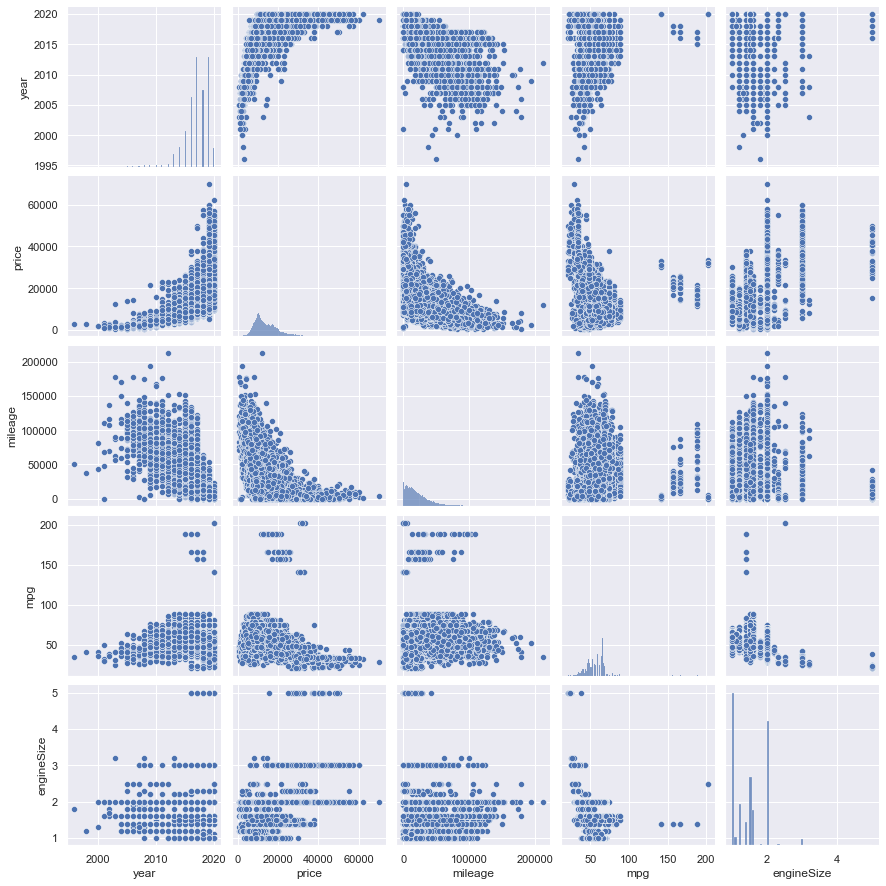

In [462]:
sns.pairplot(data=data);

what is the correlation between price and year, price and mileage ?

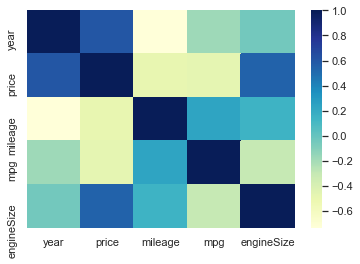

In [343]:
sns.heatmap(data.corr(),cmap="YlGnBu");#there is no correlation between price and mileage for customers, as we can see there is a correlation between price and year

In [344]:
data.corr()

year     price   mileage       mpg  engineSize
year        1.000000  0.604235 -0.738596 -0.180184   -0.041344
price       0.604235  1.000000 -0.492703 -0.468425    0.546644
mileage    -0.738596 -0.492703  1.000000  0.235761    0.149467
mpg        -0.180184 -0.468425  0.235761  1.000000   -0.303380
engineSize -0.041344  0.546644  0.149467 -0.303380    1.000000

In [ ]:
sns.countplot(data["transmission"]);

In [ ]:
plt.figure(figsize=(10,5),facecolor='w')
sns.scatterplot(dataGolf["mileage"], dataGolf["price"], hue = dataGolf["year"]);


In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='engineSize',y='price',data=dataFiesta)
plt.xlabel("Fuel Type")
plt.ylabel("price")
plt.xticks(rotation=0)
plt.grid(True)
plt.show();

In [ ]:
plt.figure(figsize=(7,7))
plt.pie(pd.value_counts(dataFiesta["transmission"]), labels=['Manual', 'Semi-Auto', 'Automatic'], autopct='%1.0f%%', labeldistance=1.2)
plt.title("Transmission of Fiesta");

In [ ]:
sns.countplot(dataFiesta["fuelType"]);
plt.title("Fuel type of Fiesta");

In [ ]:
dataFiesta.groupby('year')['price'].agg(np.mean).tail()

In [ ]:
round(dataFiesta.groupby('year')['price'].agg(np.mean).tail()).plot(kind="bar");
plt.xlabel("Year")
plt.ylabel("Price")
plt.title('Mean price of Fiesta for each year');

In [ ]:
yearGolf.head(5).plot(kind='barh')
plt.title('Popular Fiesta Year')
plt.xlabel("Count")
plt.ylabel("Year");

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(x='engineSize',y='price',data=dataFiesta)
plt.title("Most Common Engine Size")
plt.xlabel("Engine Size")
plt.ylabel("price")
plt.xticks(rotation=0)
plt.grid(True)
plt.show();

In [62]:
round(dataFiesta.groupby('year')['mileage'].agg(np.mean).tail(6)).plot(kind="bar");
plt.xlabel("Year")
plt.ylabel("Mileage")
plt.title('Mean mileage of Fiesta for each year');

In [72]:
data

model  year  price transmission  mileage fuelType   mpg  engineSize
0           Kuga  2018  15495       Manual    36091   Petrol  45.6         1.5
1          T-Roc  2019  25990    Semi-Auto     2423   Diesel  49.6         2.0
2          T-Roc  2018  17995       Manual    14337   Petrol  53.3         1.5
3           Polo  2018  17712    Semi-Auto    12224   Petrol  47.9         2.0
4         Fiesta  2019  15410       Manual     1710   Petrol  60.1         1.0
...          ...   ...    ...          ...      ...      ...   ...         ...
33117   EcoSport  2019  15984       Manual     4000   Petrol  51.4         1.0
33118         KA  2014   4290       Manual    54096   Petrol  57.7         1.2
33119       Kuga  2018  14750       Manual    22984   Diesel  64.2         1.5
33120      Focus  2017  10797       Manual    20967   Petrol  60.1         1.0
33121       Polo  2013   4998       Manual    68943   Petrol  51.4         1.2

[33055 rows x 8 columns]

In [30]:
def MAE(actuals, preds): #mean absolute error
    return np.mean(np.abs(actuals-preds))

In [31]:
def diagnostic_plot(x, y):
    plt.figure(figsize=(15,5))
    
    rgr = LinearRegression()
    rgr.fit(x,y)
    pred = rgr.predict(x)

    plt.subplot(1, 2, 1)
    plt.scatter(pred,y,alpha=0.1)
    plt.plot(y, y, color='red',linewidth=1,)
    plt.title("Regression fit")
    plt.xlabel("Predicted y")
    plt.ylabel("y")
    
    plt.subplot(1, 2, 2)
    res = y - pred
    plt.scatter(pred, res,alpha=0.1)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    print(res)    
    
    """"plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt,)
    plt.title("Normal Q-Q plot")"""

## Baseline Model

In [52]:
X = data.drop("price", axis=1)
y = data[["price"]]

In [53]:
numeric_df = X_train.select_dtypes(include=np.number)
X = numeric_df
y = y_train

In [54]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(X, y, test_size = 0.20, random_state=10 )
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.20, random_state=10 )

In [55]:
#Training
lm = LinearRegression()
lm.fit(X_train,y_train)
lm.score(X_train,y_train)

0.7413693810467918

In [56]:
#Validation
X_val_numeric = X_val.select_dtypes(include=np.number)
lm.score(X_val_numeric,y_val)

0.7427671990840321

In [971]:
#testing
lm.score(X_test,y_test)

0.7237229456842802

             price
19508  1947.606863
11203  1475.264298
20249  4820.733726
24448 -4167.085984
23237 -2393.251106
...            ...
31793   732.455956
9442    882.251355
32721 -1689.112273
26262  1048.931228
16553 -6435.919720

[4240 rows x 1 columns]


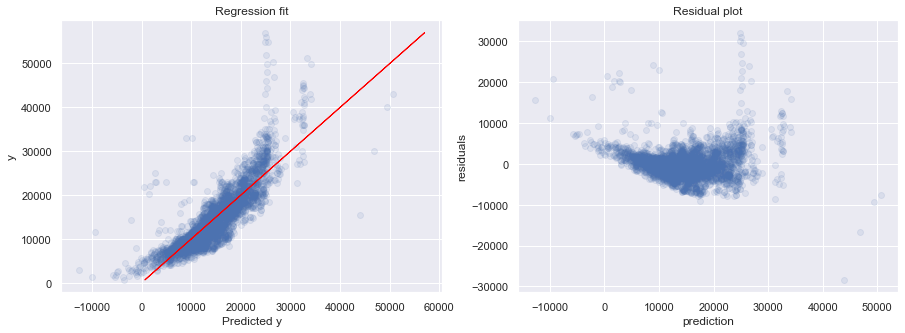

In [57]:
sns.set(style='darkgrid')
diagnostic_plot(X_test, y_test)

In [58]:
lm.predict(X_val_numeric)

array([[ 8841.79580574],
       [22524.63197103],
       [17813.86081724],
       ...,
       [18079.64502229],
       [19399.02511987],
       [18714.29405236]])

## Exprement One
get dummies

In [60]:
df_dummies = pd.get_dummies(data, drop_first=True)
df_dummies

year  price  mileage   mpg  engineSize  model_ Arteon  model_ B-MAX  \
0      2018  15790     7721  54.3         1.5              0             0   
1      2017  13331    21223  60.1         2.0              0             0   
2      2014   9975    70000  55.4         2.0              0             0   
3      2019  12990    12454  52.3         1.0              0             0   
4      2012   3491    86667  57.7         1.2              0             0   
...     ...    ...      ...   ...         ...            ...           ...   
33117  2017  14990    49789  56.5         2.0              0             0   
33118  2019  16300     5113  60.1         1.0              0             0   
33119  2020  18495     5129  46.3         1.0              0             0   
33120  2015   5969    21603  61.4         1.0              0             0   
33121  2015   9000    22093  57.7         1.0              0             0   

       model_ Beetle  model_ C-MAX  model_ CC  ...  model_ Tourneo Connect  \
0                  0             0          0  ...                       0   
1                  0             0          0  ...                       0   
2                  0             0          0  ...                       0   
3                  0             0          0  ...                       0   
4                  0             0          0  ...                       0   
...              ...           ...        ...  ...                     ...   
33117              0             0          0  ...                       0   
33118              0             0          0  ...                       0   
33119              0             0          0  ...                       0   
33120              0             0          0  ...                       0   
33121              0             0          0  ...                       0   

       model_ Tourneo Custom  model_ Transit Tourneo  model_ Up  \
0                          0                       0          0   
1                          0                       0          0   
2                          0                       0          0   
3                          0                       0          0   
4                          0                       0          0   
...                      ...                     ...        ...   
33117                      0                       0          0   
33118                      0                       0          0   
33119                      0                       0          0   
33120                      0                       0          1   
33121                      0                       0          0   

       transmission_Manual  transmission_Semi-Auto  fuelType_Electric  \
0                        1                       0                  0   
1                        1                       0                  0   
2                        1                       0                  0   
3                        1                       0                  0   
4                        1                       0                  0   
...                    ...                     ...                ...   
33117                    1                       0                  0   
33118                    1                       0                  0   
33119                    0                       1                  0   
33120                    1                       0                  0   
33121                    0                       0                  0   

       fuelType_Hybrid  fuelType_Other  fuelType_Petrol  
0                    0               0                0  
1                    0               0                0  
2                    0               0                0  
3                    0               0                1  
4                    0               0                1  
...                ...             ...              ...  
33117                0               0       

In [61]:
X = df_dummies.drop("price", axis=1)
y = df_dummies[["price"]]

In [62]:
X,X_test,y,y_test=train_test_split(X,y,test_size=0.2, random_state= 50)
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.25, random_state= 10)

In [1039]:
type(df_dummies)

pandas.core.frame.DataFrame

In [65]:
lr_dumm = LinearRegression()
lr_dumm.fit(X_train,y_train)


predicted_lr_dumm = lr_dumm.predict(X_test)
print("dummy")
print('train Score: ',lr_dumm.score(X_train,y_train))
print('validation Score: ',lr_dumm.score(X_val,y_val))
print('test Score: ',lr_dumm.score(X_test,y_test))

dummy
train Score:  0.8817839654351105
validation Score:  0.8725461550232703
test Score:  0.8831978894445628


             price
11592  -632.729985
17557 -1908.573631
23984  4640.258530
11744  2364.258162
24348  -434.607062
...            ...
30141 -3986.053524
18066   267.435468
335   -1439.312754
12107  3924.312347
8480  -1062.694346

[6625 rows x 1 columns]


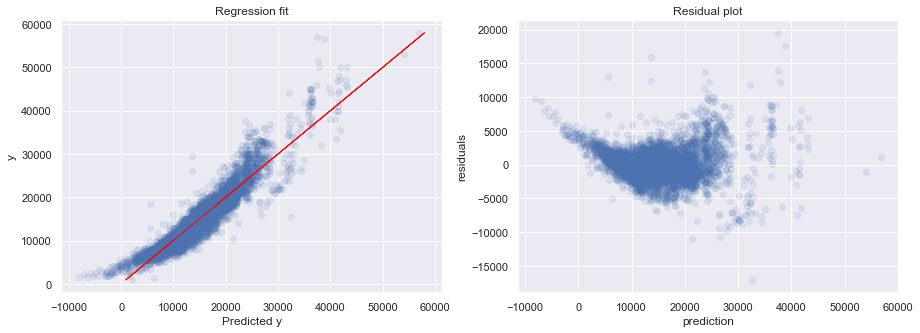

In [66]:
sns.set(style='darkgrid')
diagnostic_plot(X_test, y_test)

## Experment Two
experment with the log y

In [67]:
X = df_dummies.drop("price", axis=1)
y = df_dummies[["price"]]

In [68]:
df_dummies.columns

Index(['year', 'price', 'mileage', 'mpg', 'engineSize', 'model_ Arteon',
       'model_ B-MAX', 'model_ Beetle', 'model_ C-MAX', 'model_ CC',
       'model_ Caddy', 'model_ Caddy Life', 'model_ Caddy Maxi',
       'model_ Caddy Maxi Life', 'model_ California', 'model_ Caravelle',
       'model_ EcoSport', 'model_ Edge', 'model_ Eos', 'model_ Escort',
       'model_ Fiesta', 'model_ Focus', 'model_ Fox', 'model_ Fusion',
       'model_ Galaxy', 'model_ Golf', 'model_ Golf SV', 'model_ Grand C-MAX',
       'model_ Grand Tourneo Connect', 'model_ Jetta', 'model_ KA',
       'model_ Ka+', 'model_ Kuga', 'model_ Mondeo', 'model_ Mustang',
       'model_ Passat', 'model_ Polo', 'model_ Puma', 'model_ Ranger',
       'model_ S-MAX', 'model_ Scirocco', 'model_ Sharan', 'model_ Shuttle',
       'model_ Streetka', 'model_ T-Cross', 'model_ T-Roc', 'model_ Tiguan',
       'model_ Tiguan Allspace', 'model_ Touareg', 'model_ Touran',
       'model_ Tourneo Connect', 'model_ Tourneo Custom',
       

In [69]:
# Expr3 (log expr)
y_log = np.log(y)
y_log

price
0      9.667132
1      9.497847
2      9.207837
3      9.471935
4      8.157944
...         ...
33117  9.615139
33118  9.698920
33119  9.825256
33120  8.694335
33121  9.104980

[33121 rows x 1 columns]

In [70]:
X,X_test,y_log,y_test_log=train_test_split(X,y_log,test_size=0.2, random_state= 50)
X_train,X_val,y_log_train,y_log_val=train_test_split(X,y_log,test_size=0.25, random_state= 10)

In [71]:
lr_log = LinearRegression()
lr_log.fit(X_train,y_log_train)


predicted_lr_log = lr_log.predict(X_test)
print("Cox Exper")
print('train Score: ',lr_log.score(X_train,y_log_train))
print('validation Score: ',lr_log.score(X_val,y_log_val))
print('test Score: ',lr_log.score(X_test,y_test_log))
#print("Mean absolute Error",MAE(np.exp(y_test_cox),np.exp(predicted_lr_log)))

Cox Exper
train Score:  0.9223294305930974
validation Score:  0.9190317419071159
test Score:  0.9235524621563936


             price
11592  -632.729985
17557 -1908.573631
23984  4640.258530
11744  2364.258162
24348  -434.607062
...            ...
30141 -3986.053524
18066   267.435468
335   -1439.312754
12107  3924.312347
8480  -1062.694346

[6625 rows x 1 columns]


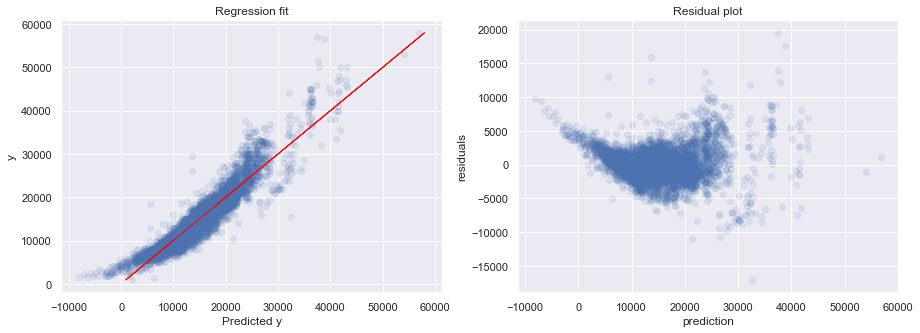

In [72]:
sns.set(style='darkgrid')
diagnostic_plot(X_test, y_test)

## Experment Three 
this experment with cox box


In [73]:
X = df_dummies.drop("price", axis=1)
y = df_dummies[["price"]]

In [74]:
from sklearn.preprocessing import power_transform
y_cox = power_transform(y, method='box-cox')

In [75]:
X,X_test,y_cox,y_test_cox=train_test_split(X,y_cox,test_size=0.2, random_state= 50)
X_train,X_val,y_train,y_val=train_test_split(X,y_cox,test_size=0.25, random_state= 10)

In [76]:
lr_cox = LinearRegression()
lr_cox.fit(X_train,y_train)


predicted_lr_cox = lr_cox.predict(X_test)
print("Cox Exper")
print('train Score: ',lr_cox.score(X_train,y_train))
print('validation Score: ',lr_cox.score(X_val,y_val))
print('test Score: ',lr_cox.score(X_test,y_test_cox))
print("Mean absolute Error",MAE(np.exp(y_test_cox),np.exp(predicted_lr_cox)))

Cox Exper
train Score:  0.923451677076514
validation Score:  0.9206593846195825
test Score:  0.9237866515558961
Mean absolute Error 0.3739342055262753


[[-0.06133965]
 [-0.0720629 ]
 [ 0.33692117]
 ...
 [ 0.56824751]
 [ 0.56393414]
 [-0.23851179]]


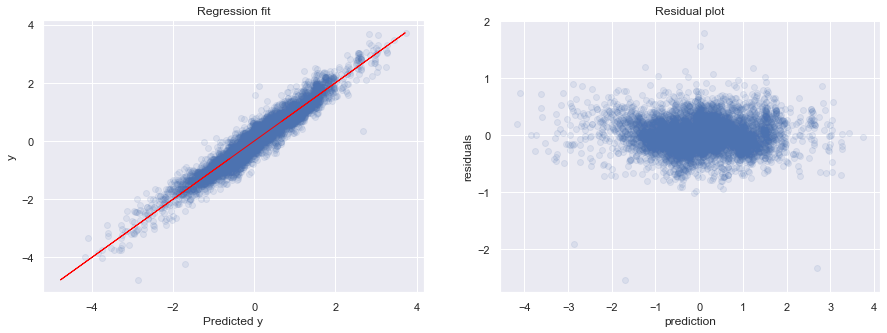

In [77]:
sns.set(style='darkgrid')
diagnostic_plot(X_test,y_test_cox)

## Experment Four
this experment with Standard Scaler

In [78]:
X = df_dummies.drop("price", axis=1)
y = df_dummies[["price"]]

In [79]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_std = std_scaler.fit_transform(X)
y_cox = power_transform(y, method='box-cox')

In [80]:
X_std,X_std_test,y_cox,y_cox_test=train_test_split(X_std,y_cox,test_size=0.2, random_state= 50)
X_std_train,X_std_val,y_cox_train,y_cox_val=train_test_split(X_std,y_cox,test_size=0.25, random_state= 10)

In [81]:
lr_std = LinearRegression()
lr_std.fit(X_std_train,y_cox_train)


predicted_lr_std = lr_std.predict(X_std_test)

print('train Score: ',lr_std.score(X_std_train,y_cox_train))
print('validation Score: ',lr_std.score(X_std_val,y_cox_val))
print('test Score: ',lr_std.score(X_std_test,y_cox_test))
#print("Mean absolute Error",MAE(np.exp(y_test),np.exp(predicted_lr_dumm)))

train Score:  0.9234516770765142
validation Score:  0.9206593846196438
test Score:  0.7990064757832654


             price
11592  -632.729985
17557 -1908.573631
23984  4640.258530
11744  2364.258162
24348  -434.607062
...            ...
30141 -3986.053524
18066   267.435468
335   -1439.312754
12107  3924.312347
8480  -1062.694346

[6625 rows x 1 columns]


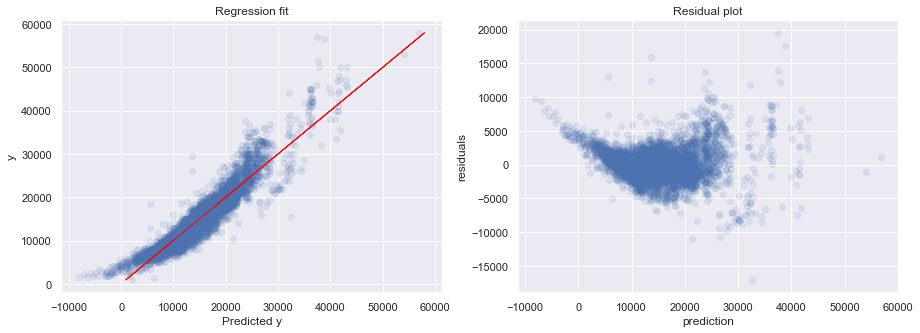

In [82]:
sns.set(style='darkgrid')
diagnostic_plot(X_test, y_test)

## Experment Five
Lasso

In [83]:
X = df_dummies.drop("price", axis=1)
y = df_dummies[["price"]]

In [84]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [85]:
from sklearn.preprocessing import StandardScaler
## Scale the data as before
std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [86]:
## Scale the Predictors on both the train and test set
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)
X_va = std.transform(X_val.values)
#y_tr = std.transform(y_train.values)
#y_te = std.transform(y_test.values)
#y_va = std.transform(y_val.values)

In [87]:
lasso_model = Lasso(alpha = 10000)
lasso_model.fit(X_tr,y_train)

Lasso(alpha=10000)

In [88]:
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}

In [89]:
lasso_grid = GridSearchCV(Lasso(), param_grid=lasso_params).fit(X_tr, y_train)

In [90]:
print('best estimator: ',lasso_grid.best_estimator_)
print('best Score: ',lasso_grid.best_score_)

best estimator:  Lasso(alpha=0.02)
best Score:  0.8791375748873997


             price
24072    18.710949
1546    838.912935
7967   1603.372179
5463  -1731.953997
7286   1394.400226
...            ...
15028   604.439333
9618   -486.319565
18897  2308.724133
24393 -1548.516345
9797    149.030261

[19833 rows x 1 columns]


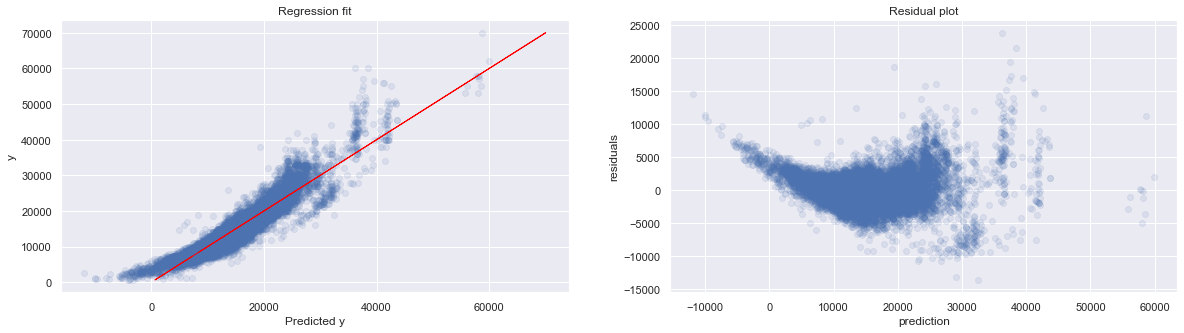

In [1010]:
sns.set(style='darkgrid')
diagnostic_plot(X_tr, y_train)

In [902]:
# print('train Score: ',lasso_model.score(X_tr,y_train))
# print('validation Score: ',lasso_model.score(X_va,y_val))
# print('test Score: ',lasso_model.score(X_te,y_test))

In [ ]:
#list(zip(X_train.columns, lasso_model.coef_))

In [864]:
# fit model with target as  price index
df1_model = sm.OLS(y, X, data = df_dummies)

results = df1_model.fit()

# summarize our model
results.summary()
# This Model

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                          1.786e+04
Date:                Mon, 06 Dec 2021   Prob (F-statistic):                        0.00
Time:                        18:22:03   Log-Likelihood:                     -3.0883e+05
No. Observations:               33055   AIC:                                  6.178e+05
Df Residuals:                   32996   BIC:                                  6.183e+05
Df Model:                          59                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
year                            11.4321      0.179     63.709      0.000      11.080      11.784
mileage                         -0.1549      0.001   -184.426      0.000      -0.157      -0.153
mpg                            -72.3501      2.180    -33.182      0.000     -76.624     -68.077
engineSize                    3998.3919     76.440     52.307      0.000    3848.566    4148.217
model_ Arteon                 -318.0097    322.396     -0.986      0.324    -949.917     313.898
model_ B-MAX                  -1.12e+04    316.520    -35.392      0.000   -1.18e+04   -1.06e+04
model_ Beetle                -9128.4765    411.148    -22.202      0.000   -9934.342   -8322.611
model_ C-MAX                 -9279.2027    303.125    -30.612      0.000   -9873.339   -8685.066
model_ CC                    -7961.8684    392.814    -20.269      0.000   -8731.797   -7191.940
model_ Caddy                 -7199.5953   1160.675     -6.203      0.000   -9474.559   -4924.631
model_ Caddy Life            -7393.8091   1014.371     -7.289      0.000   -9382.012   -5405.606
model_ Caddy Maxi            -5771.0581   1410.454     -4.092      0.000   -8535.599   -3006.517
model_ Caddy Maxi Life       -6299.5006    450.551    -13.982      0.000   -7182.597   -5416.404
model_ California             3.006e+04    763.085     39.392      0.000    2.86e+04    3.16e+04
model_ Caravelle              1.402e+04    385.491     36.376      0.000    1.33e+04    1.48e+04
model_ EcoSport              -8057.9949    295.100    -27.306      0.000   -8636.402   -7479.588
model_ Edge                  -1282.0886    330.739     -3.876      0.000   -1930.349    -633.829
model_ Eos                   -8468.7251   1080.189     -7.840      0.000   -1.06e+04   -6351.517
model_ Escort                -1.607e+04   2778.348     -5.783      0.000   -2.15e+04   -1.06e+04
model_ Fiesta                -8855.8503    287.716    -30.780      0.000   -9419.784   -8291.917
model_ Focus                 -6600.7580    282.881    -23.334      0.000   -7155.215   -6046.301
model_ Fox                   -1.004e+04   1411.695     -7.109      0.000   -1.28e+04   -7269.445
model_ Fusion                -1.235e+04    744.962    -16.575      0.000   -1.38e+04   -1.09e+04
model_ Galaxy                -3501.5642    326.563    -10.722      0.000   -4141.640   -2861.488
model_ Golf                  -5094.5880    277.712    -18.345      0.000   -5638.913   -4550.263
model_ Golf SV               -6826.8664    324.145    -21.061      0.000   -7462.202   -6191.531
model_ Grand C-MAX           -8501.8921    329.621    -25.793      0.000   -9147.961   -7855.823
model_ Grand Tourneo Connect -5368.8261    454.470    -11.813      0.000  

In [414]:
def SSE(actuals, preds):
    return np.sum((actuals - preds)**2)

SSE(y,preds)

1.2261770413867594e-26

In [415]:
def RMSE(actuals, preds): #root mean squared error
    return np.sqrt(np.mean((actuals - preds)**2))

RMSE(y,preds)


6.090570987225988e-16

In [416]:
def MAE(actuals, preds): #mean absolute error
    return np.mean(np.abs(actuals-preds))

MAE(y,preds)

4.1978891161027136e-16

In [417]:
def SST(y):
    return np.sum((y - np.mean(y))**2)

def R2(actuals, preds):
    return 1 - SSE(actuals, preds) / SST(actuals)

R2(y,preds)

1.0

In [418]:
def SST(y):
    return np.sum((y - np.mean(y))**2)

def R2(actuals, preds):
    return 1 - SSE(actuals, preds) / SST(actuals)

R2(y,preds)

1.0